# Probability 2: Loaded dice 

In this assignment you will be reinforcening your intuition about the concepts covered in the lectures by taking the example with the dice to the next level. 

This assignment will not evaluate your coding skills but rather your intuition and analytical skills. You can answer any of the exercise questions by any means necessary, you can take the analytical route and compute the exact values or you can alternatively create some code that simulates the situations at hand and provide approximate values (grading will have some tolerance to allow approximate solutions). It is up to you which route you want to take! 

Note that every exercise has a blank cell that you can use to make your calculations, this cell has just been placed there for you convenience but **will not be graded** so you can leave empty if you want to.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import utils

## Some concept clarifications 🎲🎲🎲

During this assignment you will be presented with various scenarios that involve dice. Usually dice can have different numbers of sides and can be either fair or loaded.

- A fair dice has equal probability of landing on every side.
- A loaded dice does not have equal probability of landing on every side. Usually one (or more) sides have a greater probability of showing up than the rest.

Let's get started!

## Exercise 1:



Given a 6-sided fair dice (all of the sides have equal probability of showing up), compute the mean and variance for the probability distribution that models said dice. The next figure shows you a visual represenatation of said distribution:

<img src="./images/fair_dice.png" style="height: 300px;"/>

**Submission considerations:**
- Submit your answers as floating point numbers with three digits after the decimal point
- Example: To submit the value of 1/4 enter 0.250

Hints: 
- You can use [np.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) to simulate a fair dice.
- You can use [np.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) and [np.var](https://numpy.org/doc/stable/reference/generated/numpy.var.html) to compute the mean and variance of a numpy array.

mean of rolls: 3.51
variance of rolls: 2.89


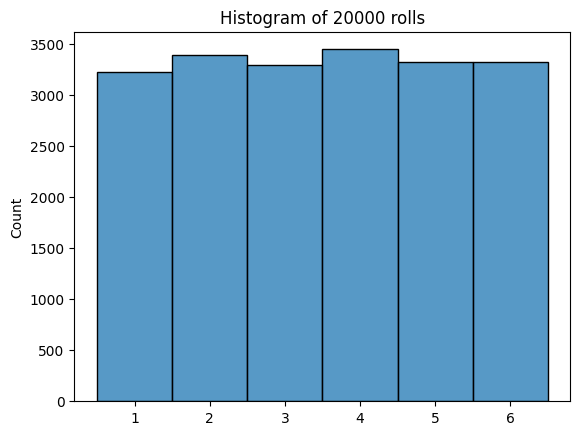

In [4]:
# You can use this cell for your calculations (not graded)
# Define the desired number of sides (try changing this value!)
n_sides = 6

# Represent a dice by using a numpy array
dice = np.array([i for i in range(1, n_sides+1)])

#dice
# Roll the dice 20k times
n_rolls = 20_000

# Save the result of each roll
rolls = np.array([np.random.choice(dice) for _ in range(n_rolls)])

# Compute mean of 20 rolls
m = np.mean(rolls)

# Compute variance of 20 rolls
v = np.var(rolls)

print(f"mean of rolls: {m:.2f}\nvariance of rolls: {v:.2f}")

# Display histogram of 20 rolls
n_rolls_hist = sns.histplot(rolls, discrete=True)
n_rolls_hist.set(title=f"Histogram of {n_rolls} rolls")
plt.show()

In [3]:
# Run this cell to submit your answer
utils.exercise_1()

FloatText(value=0.0, description='Mean:')

FloatText(value=0.0, description='Variance:')

Button(button_style='success', description='Save your answer!', style=ButtonStyle())

Output()

## Exercise 2:

Now suppose you are throwing the dice (same dice as in the previous exercise) two times and recording the sum of each throw. Which of the following `probability mass functions` will be the one you should get?

<table><tr>
<td> <img src="./images/hist_sum_6_side.png" style="height: 300px;"/> </td>
<td> <img src="./images/hist_sum_5_side.png" style="height: 300px;"/> </td>
<td> <img src="./images/hist_sum_6_uf.png" style="height: 300px;"/> </td>
</tr></table>


Hints: 
- You can use numpy arrays to hold the results of many throws.
- You can sum to numpy arrays by using the `+` operator like this: `sum = first_throw + second_throw`
- To simulate multiple throws of a dice you can use list comprehension or a for loop

mean of first_rolls: 3.50
variance of first_rolls: 2.94

mean of second_rolls: 3.49
variance of second_rolls: 2.90

mean of sum_of_rolls: 6.99
variance of sum_of_rolls: 5.73

covariance between first and second roll:
[[ 2.93843731 -0.05203205]
 [-0.05203205  2.89635457]]


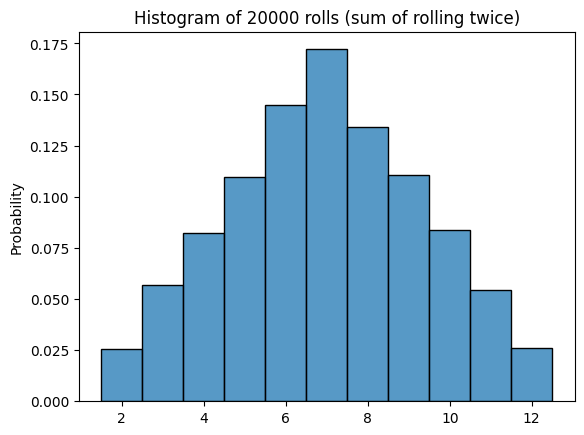

In [5]:
# You can use this cell for your calculations (not graded)
n_rolls = 20_000

# First roll (same as before)
first_rolls = np.array([np.random.choice(dice) for _ in range(n_rolls)])

# Second roll (code is the same but saved in a new numpy array)
second_rolls = np.array([np.random.choice(dice) for _ in range(n_rolls)])

# Sum both rolls (this is easy since numpy allows vectorization)
sum_of_rolls = first_rolls + second_rolls

# Print mean, variance and covariance
print(f"mean of first_rolls: {np.mean(first_rolls):.2f}\nvariance of first_rolls: {np.var(first_rolls):.2f}\n")
print(f"mean of second_rolls: {np.mean(second_rolls):.2f}\nvariance of second_rolls: {np.var(second_rolls):.2f}\n")
print(f"mean of sum_of_rolls: {np.mean(sum_of_rolls):.2f}\nvariance of sum_of_rolls: {np.var(sum_of_rolls):.2f}\n")
print(f"covariance between first and second roll:\n{np.cov(first_rolls, second_rolls)}")

# Plot histogram
sum_2_rolls_hist = sns.histplot(sum_of_rolls, stat = "probability", discrete=True)
sum_2_rolls_hist.set(title=f"Histogram of {n_rolls} rolls (sum of rolling twice)")
plt.show()


In [6]:
# Run this cell to submit your answer
utils.exercise_2()

ToggleButtons(description='Your answer:', options=('left', 'center', 'right'), value='left')

Button(button_style='success', description='Save your answer!', style=ButtonStyle())

Output()

## Exercise 3:

Given a fair 4-sided dice, you throw it two times and record the sum. The figure on the left shows the probabilities of the dice landing on each side and the right figure the histogram of the sum. Fill out the probabilities of each sum (notice that the distribution of the sum is symetrical so you only need to input 4 values in total):

<img src="./images/4_side_hists.png" style="height: 300px;"/>

**Submission considerations:**
- Submit your answers as floating point numbers with three digits after the decimal point
- Example: To submit the value of 1/4 enter 0.250

In [62]:
def load_dice(n_sides, loaded_number):
    
    # All probabilities are initially the same
    probs = np.array([1/(n_sides+1) for _ in range(n_sides)])
    
    # Assign the loaded side a probability that is twice as the other ones
    probs[loaded_number-1] = 1 - sum(probs[:-1])
    
    # Check that all probabilities sum up to 1
    if not np.isclose(sum(probs), 1):
        print("All probabilities should add up to 1")
        return
    
    return probs 

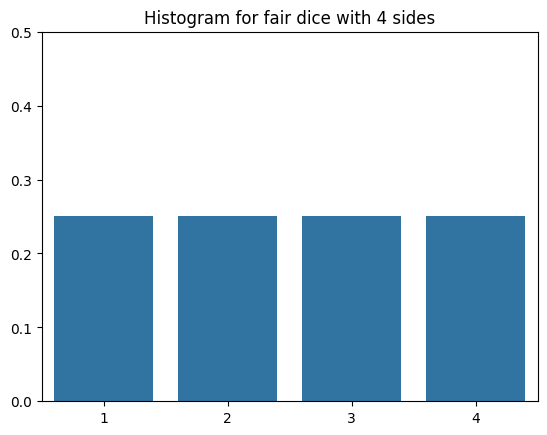

In [63]:
n_sides = 4
dice = np.array([i for i in range(1, n_sides+1)])

# Compute same probabilities for every side
probs_fair_dice = np.array([1/n_sides]*n_sides)

# Plot probabilities
fair_dice_sides = sns.barplot(x=dice, y=probs_fair_dice)
fair_dice_sides.set(title=f"Histogram for fair dice with {n_sides} sides")
fair_dice_sides.set_ylim(0,0.5)
plt.show()

mean of first_rolls: 2.50
variance of first_rolls: 1.26

mean of second_rolls: 2.49
variance of second_rolls: 1.25

mean of sum_of_rolls: 4.99
variance of sum_of_rolls: 2.48

covariance between first and second roll:
[[ 1.25935141 -0.01205535]
 [-0.01205535  1.24748581]]


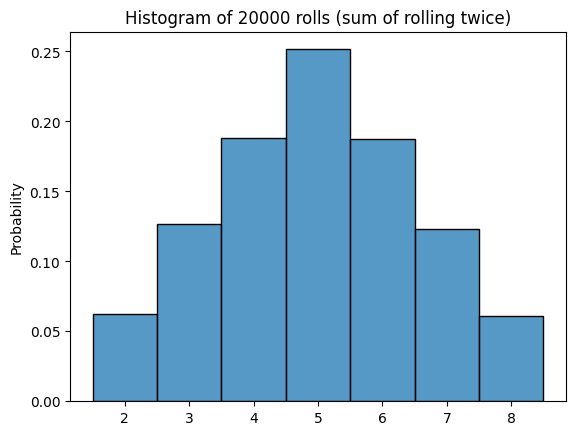

In [64]:
# You can use this cell for your calculations (not graded)
# You can use this cell for your calculations (not graded)
n_rolls = 20_000

# First roll (same as before)
first_rolls = np.array([np.random.choice(dice) for _ in range(n_rolls)])

# Second roll (code is the same but saved in a new numpy array)
second_rolls = np.array([np.random.choice(dice) for _ in range(n_rolls)])

# Sum both rolls (this is easy since numpy allows vectorization)
sum_of_rolls = first_rolls + second_rolls

# Print mean, variance and covariance
print(f"mean of first_rolls: {np.mean(first_rolls):.2f}\nvariance of first_rolls: {np.var(first_rolls):.2f}\n")
print(f"mean of second_rolls: {np.mean(second_rolls):.2f}\nvariance of second_rolls: {np.var(second_rolls):.2f}\n")
print(f"mean of sum_of_rolls: {np.mean(sum_of_rolls):.2f}\nvariance of sum_of_rolls: {np.var(sum_of_rolls):.2f}\n")
print(f"covariance between first and second roll:\n{np.cov(first_rolls, second_rolls)}")

# Plot histogram
sum_2_rolls_hist = sns.histplot(sum_of_rolls, stat = "probability", discrete=True)
sum_2_rolls_hist.set(title=f"Histogram of {n_rolls} rolls (sum of rolling twice)")
plt.show()



In [65]:
def get_probability_of_sum1(dice_sum):
    return round(sum([ 1 for x in sum_of_rolls if x == dice_sum])/n_rolls, 2)

def get_probability_of_sum2(dice_sum1, dice_sum2):
    return round(sum([ 1 for x in sum_of_rolls if x == dice_sum1 or x == dice_sum2])/n_rolls, 2)

In [66]:
print(f'P(sum=2|8) = {get_probability_of_sum1(2)}')

print(f'P(sum=3|7) = {get_probability_of_sum1(3)}')

print(f'P(sum=4|6) = {get_probability_of_sum1(4)}')

print(f'P(sum=5) = {get_probability_of_sum1(5)}')

P(sum=2|8) = 0.06
P(sum=3|7) = 0.13
P(sum=4|6) = 0.19
P(sum=5) = 0.25


In [15]:
# Run this cell to submit your answer
utils.exercise_3()

FloatText(value=0.0, description='P for sum=2|8', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.0, description='P for sum=3|7:', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.0, description='P for sum=4|6:', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.0, description='P for sum=5:', style=DescriptionStyle(description_width='initial'))

Button(button_style='success', description='Save your answer!', style=ButtonStyle())

Output()

## Exercise 4:

Using the same scenario as in the previous exercise. Compute the mean and variance of the sum of the two throws  and the covariance between the first and the second throw:

<img src="./images/4_sided_hist_no_prob.png" style="height: 300px;"/>


Hints:
- You can use [np.cov](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) to compute the covariance of two numpy arrays (this may not be needed for this particular exercise).

In [18]:
# You can use this cell for your calculations (not graded)
# Print mean, variance and covariance
print(f"mean of first_rolls: {np.mean(first_rolls):.2f}\nvariance of first_rolls: {np.var(first_rolls):.2f}\n")
print(f"mean of second_rolls: {np.mean(second_rolls):.2f}\nvariance of second_rolls: {np.var(second_rolls):.2f}\n")
print(f"mean of sum_of_rolls: {np.mean(sum_of_rolls):.2f}\nvariance of sum_of_rolls: {np.var(sum_of_rolls):.2f}\n")
print(f"covariance between first and second roll:\n{np.cov(first_rolls, second_rolls)}")


mean of first_rolls: 2.50
variance of first_rolls: 1.26

mean of second_rolls: 2.50
variance of second_rolls: 1.25

mean of sum_of_rolls: 5.00
variance of sum_of_rolls: 2.48

covariance between first and second roll:
[[ 1.25736281 -0.01102538]
 [-0.01102538  1.24796191]]


In [19]:
# Run this cell to submit your answer
utils.exercise_4()

FloatText(value=0.0, description='Mean:')

FloatText(value=0.0, description='Variance:')

FloatText(value=0.0, description='Covariance:')

Button(button_style='success', description='Save your answer!', style=ButtonStyle())

Output()

## Exercise 5:


Now suppose you are have a loaded 4-sided dice (it is loaded so that it lands twice as often on side 2 compared to the other sides): 


<img src="./images/4_side_uf.png" style="height: 300px;"/>

You are throwing it two times and recording the sum of each throw. Which of the following `probability mass functions` will be the one you should get?

<table><tr>
<td> <img src="./images/hist_sum_4_4l.png" style="height: 300px;"/> </td>
<td> <img src="./images/hist_sum_4_3l.png" style="height: 300px;"/> </td>
<td> <img src="./images/hist_sum_4_uf.png" style="height: 300px;"/> </td>
</tr></table>

Hints: 
- You can use the `p` parameter of [np.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) to simulate a loaded dice.

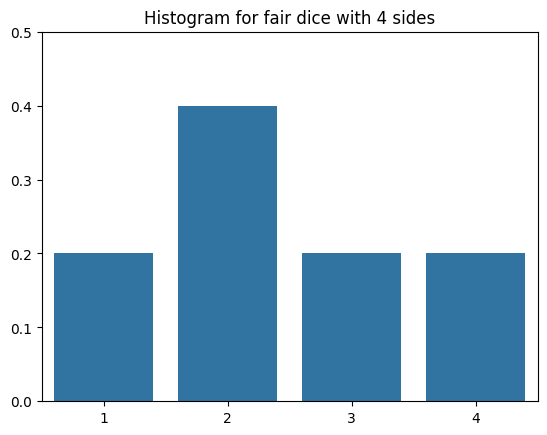

In [20]:
# You can use this cell for your calculations (not graded)
# Compute same probabilities for every side
probs_fair_dice = load_dice(4, 2)

# Plot probabilities
fair_dice_sides = sns.barplot(x=dice, y=probs_fair_dice)
fair_dice_sides.set(title=f"Histogram for fair dice with {n_sides} sides")
fair_dice_sides.set_ylim(0,0.5)
plt.show()

mean of first_rolls: 2.41
variance of first_rolls: 1.05

mean of second_rolls: 2.40
variance of second_rolls: 1.04

mean of sum_of_rolls: 4.81
variance of sum_of_rolls: 2.08

covariance between first and second roll:
[[ 1.05011682 -0.00478805]
 [-0.00478805  1.03583529]]


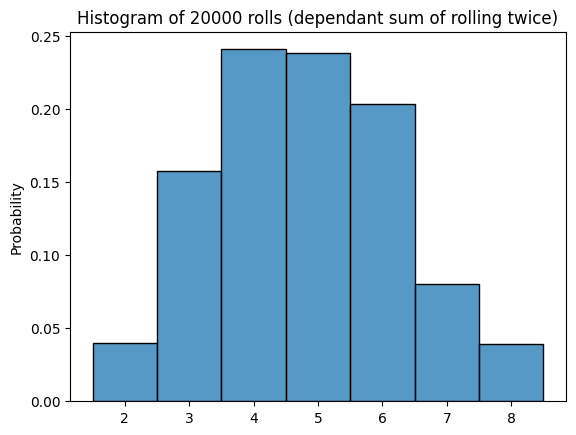

In [21]:
n_rolls = 20_000

dice_prob = load_dice(4, 2)

numberList = [1, 2, 3, 4]

first_rolls = np.random.choice(numberList, n_rolls, p=dice_prob)

second_rolls = np.random.choice(numberList, n_rolls, p=dice_prob)

sum_of_rolls = first_rolls + second_rolls

print(f"mean of first_rolls: {np.mean(first_rolls):.2f}\nvariance of first_rolls: {np.var(first_rolls):.2f}\n")
print(f"mean of second_rolls: {np.mean(second_rolls):.2f}\nvariance of second_rolls: {np.var(second_rolls):.2f}\n")
print(f"mean of sum_of_rolls: {np.mean(sum_of_rolls):.2f}\nvariance of sum_of_rolls: {np.var(sum_of_rolls):.2f}\n")
print(f"covariance between first and second roll:\n{np.cov(first_rolls, second_rolls)}")

# Plot histogram
dependant_rolls_hist = sns.histplot(sum_of_rolls, stat = "probability", discrete=True)
dependant_rolls_hist.set(title=f"Histogram of {n_rolls} rolls (dependant sum of rolling twice)")
dependant_rolls_hist.set_xticks(range(min(sum_of_rolls),max(sum_of_rolls)+1))
plt.show()

In [22]:
# Run this cell to submit your answer
utils.exercise_5()

ToggleButtons(description='Your answer:', options=('left', 'center', 'right'), value='left')

Button(button_style='success', description='Save your answer!', style=ButtonStyle())

Output()

## Exercise 6:

You have a 6-sided dice that is loaded so that it lands twice as often on side 3 compared to the other sides:

<img src="./images/loaded_6_side.png" style="height: 300px;"/>

You record the sum of throwing it twice. What is the highest value (of the sum) that will yield a cumulative probability lower or equal to 0.5?

<img src="./images/loaded_6_cdf.png" style="height: 300px;"/>

Hints:
- The probability of side 3 is equal to $\frac{2}{7}$

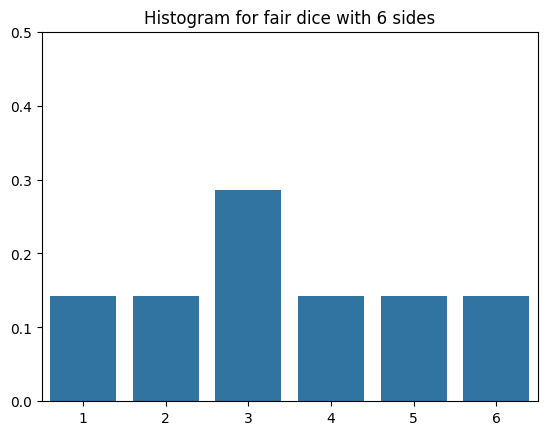

In [25]:
# You can use this cell for your calculations (not graded)
n_sides = 6

# Represent a dice by using a numpy array
dice = np.array([i for i in range(1, n_sides+1)])

# Compute same probabilities for every side
probs_dice = [0.143, 0.143, 0.286, 0.143, 0.143, 0.143]

# Plot probabilities
fair_dice_sides = sns.barplot(x=dice, y=probs_dice)
fair_dice_sides.set(title=f"Histogram for fair dice with {n_sides} sides")
fair_dice_sides.set_ylim(0,0.5)
plt.show()


mean of first_rolls: 3.43
variance of first_rolls: 2.57

mean of second_rolls: 3.44
variance of second_rolls: 2.53

mean of sum_of_rolls: 6.87
variance of sum_of_rolls: 5.13

covariance between first and second roll:
[[2.56752281 0.01498265]
 [0.01498265 2.52868259]]


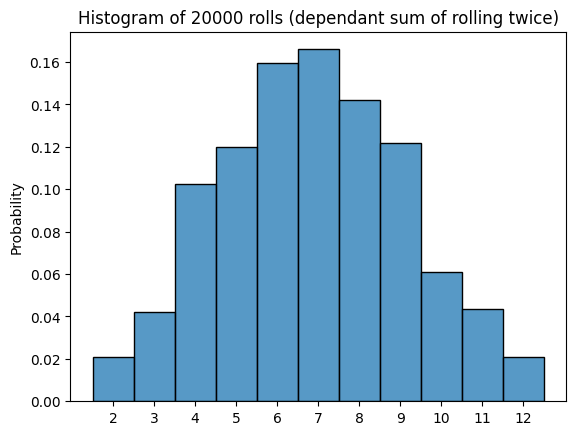

In [27]:
n_rolls = 20_000

# Represent a dice by using a numpy array
dice = np.array([i for i in range(1, n_sides+1)])

# Compute same probabilities for every side
probs_dice = [0.143, 0.143, 0.285, 0.143, 0.143, 0.143]

numberList = np.array(range(1, 7))

first_rolls = np.random.choice(numberList, n_rolls, p=probs_dice)

second_rolls = np.random.choice(numberList, n_rolls, p=probs_dice)

sum_of_rolls = first_rolls + second_rolls

print(f"mean of first_rolls: {np.mean(first_rolls):.2f}\nvariance of first_rolls: {np.var(first_rolls):.2f}\n")
print(f"mean of second_rolls: {np.mean(second_rolls):.2f}\nvariance of second_rolls: {np.var(second_rolls):.2f}\n")
print(f"mean of sum_of_rolls: {np.mean(sum_of_rolls):.2f}\nvariance of sum_of_rolls: {np.var(sum_of_rolls):.2f}\n")
print(f"covariance between first and second roll:\n{np.cov(first_rolls, second_rolls)}")

# Plot histogram
dependant_rolls_hist = sns.histplot(sum_of_rolls, stat = "probability", discrete=True)
dependant_rolls_hist.set(title=f"Histogram of {n_rolls} rolls (dependant sum of rolling twice)")
dependant_rolls_hist.set_xticks(range(min(sum_of_rolls),max(sum_of_rolls)+1))
plt.show()

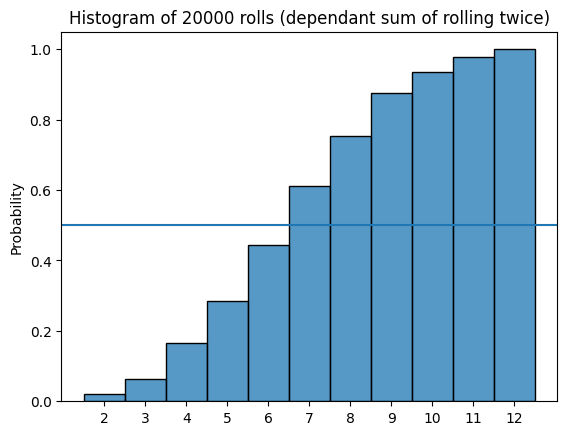

In [28]:
#sns.histplot(sum_of_rolls, stat = "probability", cumulative=True)
# Plot histogram
dependant_rolls_hist = sns.histplot(sum_of_rolls, stat = "probability", cumulative=True, discrete=True)
dependant_rolls_hist.axhline(y = 0.5,    # Line on y = 0.2
                               xmin = 0.0, # From the left
                               xmax = 12) # To the right
dependant_rolls_hist.set(title=f"Histogram of {n_rolls} rolls (dependant sum of rolling twice)")
dependant_rolls_hist.set_xticks(range(min(sum_of_rolls),max(sum_of_rolls)+1))
plt.show()

In [29]:
# Run this cell to submit your answer
utils.exercise_6()

IntSlider(value=2, continuous_update=False, description='Sum:', max=12, min=2)

Button(button_style='success', description='Save your answer!', style=ButtonStyle())

Output()

## Exercise 7:

Given a 6-sided fair dice you try a new game. You only throw the dice a second time if the result of the first throw is **lower** or equal to 3. Which of the following `probability mass functions` will be the one you should get given this new constraint?

<table><tr>
<td> <img src="./images/6_sided_cond_green.png" style="height: 250px;"/> </td>
<td> <img src="./images/6_sided_cond_blue.png" style="height: 250px;"/> </td>
<td> <img src="./images/6_sided_cond_red.png" style="height: 250px;"/> </td>
<td> <img src="./images/6_sided_cond_brown.png" style="height: 250px;"/> </td>

</tr></table>

Hints:
- You can simulate the second throws as a numpy array and then make the values that met a certain criteria equal to 0 by using [np.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

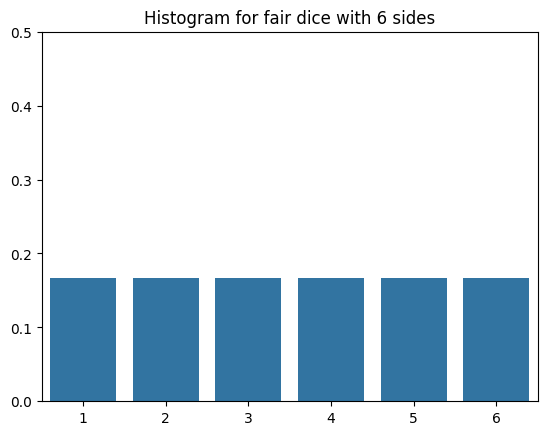

In [30]:
# You can use this cell for your calculations (not graded)
n_sides = 6

dice = np.array([i for i in range(1, n_sides+1)])

# Compute same probabilities for every side
probs_fair_dice = np.array([1/n_sides]*n_sides)

# Plot probabilities
fair_dice_sides = sns.barplot(x=dice, y=probs_fair_dice)
fair_dice_sides.set(title=f"Histogram for fair dice with {n_sides} sides")
fair_dice_sides.set_ylim(0,0.5)
plt.show()


mean of first_rolls: 3.49
variance of first_rolls: 2.94

mean of second_rolls: 1.77
variance of second_rolls: 4.54

mean of sum_of_rolls: 5.26
variance of sum_of_rolls: 2.19

covariance between first and second roll:
[[ 2.9423688  -2.64655677]
 [-2.64655677  4.54178373]]


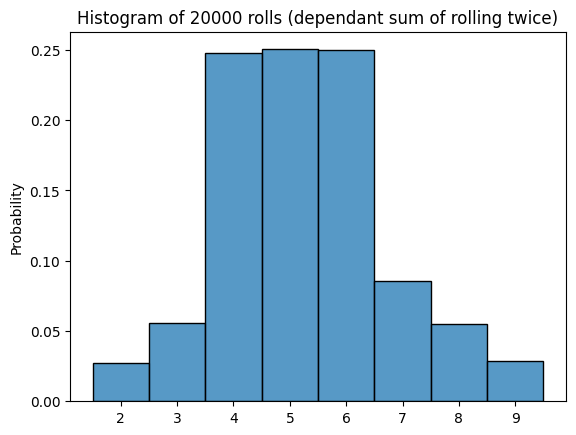

In [31]:
n_rolls = 20_000

dice = np.array([i for i in range(1, n_sides+1)])

# Compute same probabilities for every side
dice_prob = np.array([1/n_sides]*n_sides)

numberList = dice

first_rolls = np.random.choice(numberList, n_rolls, p=dice_prob)

second_rolls = np.random.choice(numberList, n_rolls, p=dice_prob)

# Preserve the result of the second throw only if the first roll was lower than or = 3
second_rolls = np.where(first_rolls<=3, second_rolls, 0)

sum_of_rolls = first_rolls + second_rolls

print(f"mean of first_rolls: {np.mean(first_rolls):.2f}\nvariance of first_rolls: {np.var(first_rolls):.2f}\n")
print(f"mean of second_rolls: {np.mean(second_rolls):.2f}\nvariance of second_rolls: {np.var(second_rolls):.2f}\n")
print(f"mean of sum_of_rolls: {np.mean(sum_of_rolls):.2f}\nvariance of sum_of_rolls: {np.var(sum_of_rolls):.2f}\n")
print(f"covariance between first and second roll:\n{np.cov(first_rolls, second_rolls)}")

# Plot histogram
dependant_rolls_hist = sns.histplot(sum_of_rolls, stat = "probability", discrete=True)
dependant_rolls_hist.set(title=f"Histogram of {n_rolls} rolls (dependant sum of rolling twice)")
dependant_rolls_hist.set_xticks(range(min(sum_of_rolls),max(sum_of_rolls)+1))
plt.show()

In [32]:
# Run this cell to submit your answer
utils.exercise_7()

ToggleButtons(description='Your answer:', options=('left-most', 'left-center', 'right-center', 'right-most'), …

Button(button_style='success', description='Save your answer!', style=ButtonStyle())

Output()

## Exercise 8:

Given the same scenario as in the previous exercise but with the twist that you only throw the dice a second time if the result of the first throw is **greater** or equal to 3. Which of the following `probability mass functions` will be the one you should get given this new constraint?

<table><tr>
<td> <img src="./images/6_sided_cond_green2.png" style="height: 250px;"/> </td>
<td> <img src="./images/6_sided_cond_blue2.png" style="height: 250px;"/> </td>
<td> <img src="./images/6_sided_cond_red2.png" style="height: 250px;"/> </td>
<td> <img src="./images/6_sided_cond_brown2.png" style="height: 250px;"/> </td>

</tr></table>


mean of first_rolls: 3.50
variance of first_rolls: 2.93

mean of second_rolls: 2.33
variance of second_rolls: 4.70

mean of sum_of_rolls: 5.83
variance of sum_of_rolls: 12.38

covariance between first and second roll:
[[2.92954647 2.37390177]
 [2.37390177 4.70357269]]


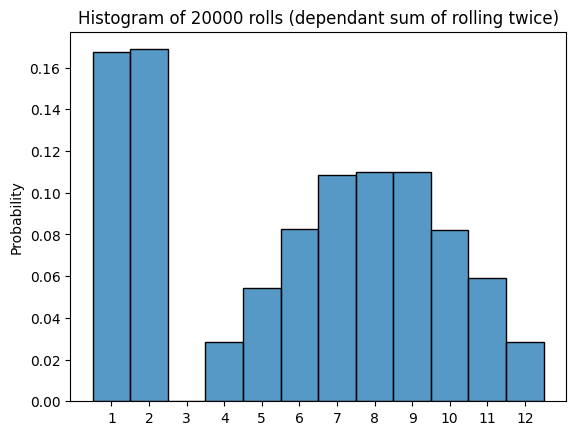

In [33]:
# You can use this cell for your calculations (not graded)
n_rolls = 20_000
n_sides = 6

dice = np.array([i for i in range(1, n_sides+1)])

# Compute same probabilities for every side
dice_prob = np.array([1/n_sides]*n_sides)

numberList = dice

first_rolls = np.random.choice(numberList, n_rolls, p=dice_prob)

second_rolls = np.random.choice(numberList, n_rolls, p=dice_prob)

# Preserve the result of the second throw only if the first roll was greater than or = 3
second_rolls = np.where(first_rolls>=3, second_rolls, 0)

sum_of_rolls = first_rolls + second_rolls

print(f"mean of first_rolls: {np.mean(first_rolls):.2f}\nvariance of first_rolls: {np.var(first_rolls):.2f}\n")
print(f"mean of second_rolls: {np.mean(second_rolls):.2f}\nvariance of second_rolls: {np.var(second_rolls):.2f}\n")
print(f"mean of sum_of_rolls: {np.mean(sum_of_rolls):.2f}\nvariance of sum_of_rolls: {np.var(sum_of_rolls):.2f}\n")
print(f"covariance between first and second roll:\n{np.cov(first_rolls, second_rolls)}")

# Plot histogram
dependant_rolls_hist = sns.histplot(sum_of_rolls, stat = "probability", discrete=True)
dependant_rolls_hist.set(title=f"Histogram of {n_rolls} rolls (dependant sum of rolling twice)")
dependant_rolls_hist.set_xticks(range(min(sum_of_rolls),max(sum_of_rolls)+1))
plt.show()

In [34]:
# Run this cell to submit your answer
utils.exercise_8()

ToggleButtons(description='Your answer:', options=('left-most', 'left-center', 'right-center', 'right-most'), …

Button(button_style='success', description='Save your answer!', style=ButtonStyle())

Output()

## Exercise 9:

Given a n-sided fair dice. You throw it twice and record the sum. How does increasing the number of sides `n` of the dice impact the mean and variance of the sum and the covariance of the joint distribution?

In [77]:
# You can use this cell for your calculations (not graded)
def Toss_nsided_twice(n_sides):
    #print(f"Number of sides = {n_sides}")
    dice = np.array([i for i in range(1, n_sides+1)])
    # Compute same probabilities for every side
    dice_prob = np.array([1/n_sides]*n_sides)

    # Plot probabilities
    #     fair_dice_sides = sns.barplot(x=dice, y=dice_prob)
    #     fair_dice_sides.set(title=f"Histogram for fair dice with {n_sides} sides")
    #     fair_dice_sides.set_ylim(0,0.5)
    #     plt.show()
    n_rolls = 50_000

    numberList = dice

    first_rolls = np.random.choice(numberList, n_rolls, p=dice_prob)

    second_rolls = np.random.choice(numberList, n_rolls, p=dice_prob)

    sum_of_rolls = first_rolls + second_rolls

    mean = np.mean(sum_of_rolls)
    variance = np.var(sum_of_rolls)
    covariance = np.cov(first_rolls, second_rolls)[0][1]
    
    return mean, variance, covariance

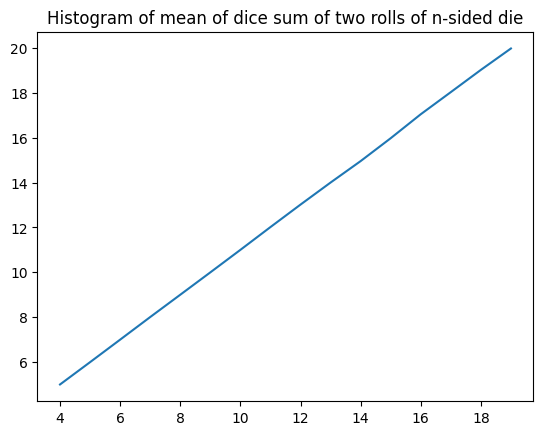

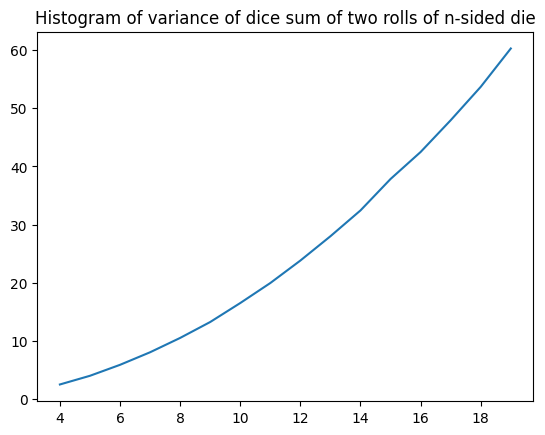

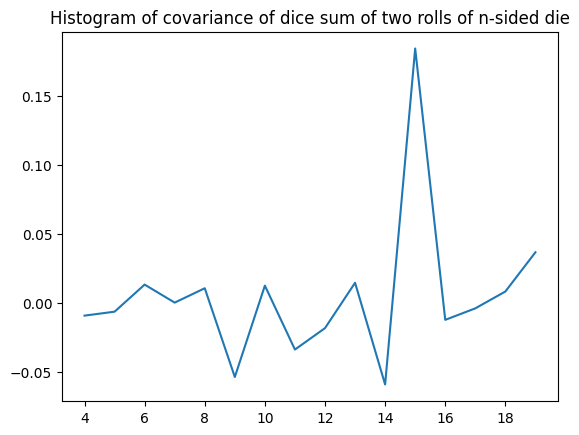

In [78]:
x = []
arr_mean = []
arr_var = []
arr_cov = []
for n in range(4, 20):
    x.append(n)
    mu, var, cov = Toss_nsided_twice(n_sides=n)
    arr_mean.append(mu)
    arr_var.append(var)
    arr_cov.append(cov)
    
mean_hist = sns.lineplot(x=x, y=arr_mean)
mean_hist.set(title=f"Histogram of mean of dice sum of two rolls of n-sided die")
plt.show()

var_hist = sns.lineplot(x=x, y=arr_var)
var_hist.set(title=f"Histogram of variance of dice sum of two rolls of n-sided die")
plt.show()

cov_hist = sns.lineplot(x=x, y=arr_cov)
cov_hist.set(title=f"Histogram of covariance of dice sum of two rolls of n-sided die")
plt.show()


In [52]:
# Run this cell to submit your answer
utils.exercise_9()

As the number of sides in the die increases:


ToggleButtons(description='The mean of the sum:', options=('stays the same', 'increases', 'decreases'), value=…

ToggleButtons(description='The variance of the sum:', options=('stays the same', 'increases', 'decreases'), va…

ToggleButtons(description='The covariance of the joint distribution:', options=('stays the same', 'increases',…

Button(button_style='success', description='Save your answer!', style=ButtonStyle())

Output()

## Exercise 10:

Given a 6-sided loaded dice. You throw it twice and record the sum. Which of the following statemets is true?

In [55]:
# You can use this cell for your calculations (not graded)
def get_6_sided_loaded_sum(loaded):
    #print(f"Side loaded = {loaded}")
    n_sides = 6

    # Represent a dice by using a numpy array
    numberList = np.array([i for i in range(1, n_sides+1)])

    # Compute same probabilities for every side
    dice_prob = load_dice(n_sides, loaded) 

    n_rolls = 50_000

    first_rolls = np.random.choice(numberList, n_rolls, p=dice_prob)

    second_rolls = np.random.choice(numberList, n_rolls, p=dice_prob)

    sum_of_rolls = first_rolls + second_rolls

    #print(f"mean of first_rolls: {np.mean(first_rolls):.2f}\nvariance of first_rolls: {np.var(first_rolls):.2f}\n")
    #print(f"mean of second_rolls: {np.mean(second_rolls):.2f}\nvariance of second_rolls: {np.var(second_rolls):.2f}\n")
    #print(f"mean of sum_of_rolls: {np.mean(sum_of_rolls):.2f}\nvariance of sum_of_rolls: {np.var(sum_of_rolls):.2f}\n")
    #print(f"covariance between first and second roll:\n{np.cov(first_rolls, second_rolls)}")
    #print("--"*50)
    #print()
    return np.mean(sum_of_rolls), np.var(sum_of_rolls), np.cov(first_rolls, second_rolls)[0, -1]

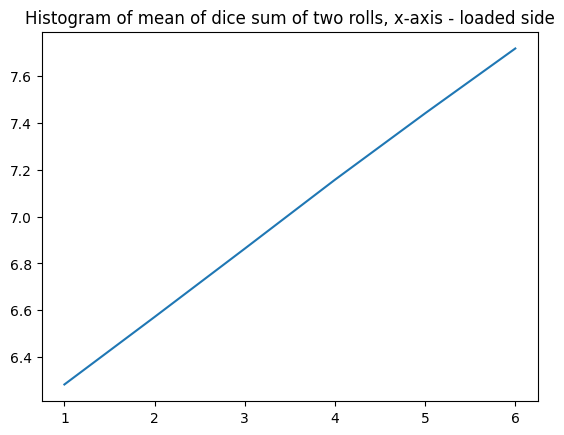

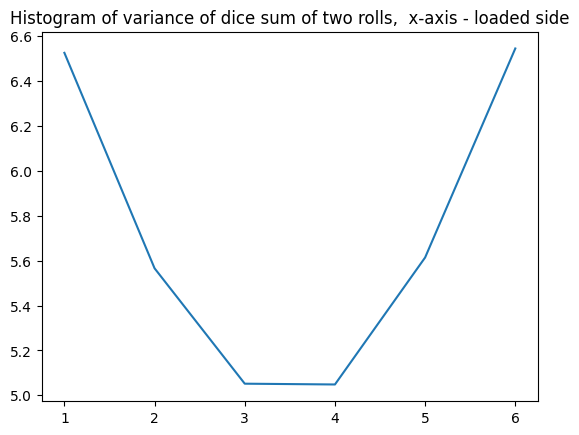

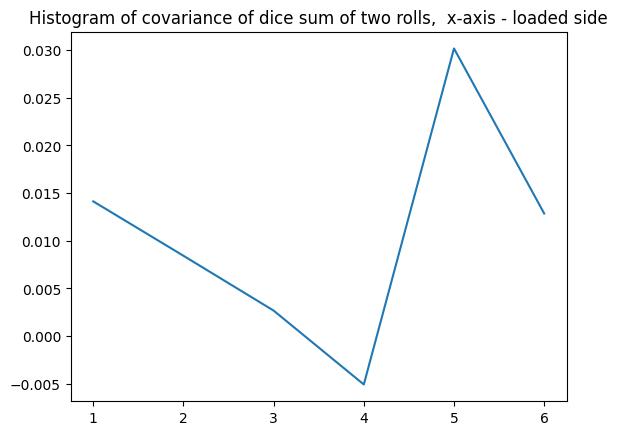

In [57]:
x = []
arr_mean = []
arr_var = []
arr_cov = []
for n in range(1, 7):
    x.append(n)
    mu, var, cov = get_6_sided_loaded_sum(loaded=n)
    arr_mean.append(mu)
    arr_var.append(var)
    arr_cov.append(cov)
    
mean_hist = sns.lineplot(x=x, y=arr_mean)
mean_hist.set(title=f"Histogram of mean of dice sum of two rolls, x-axis - loaded side")
plt.show()

var_hist = sns.lineplot(x=x, y=arr_var)
var_hist.set(title=f"Histogram of variance of dice sum of two rolls,  x-axis - loaded side")
plt.show()

cov_hist = sns.lineplot(x=x, y=arr_cov)
cov_hist.set(title=f"Histogram of covariance of dice sum of two rolls,  x-axis - loaded side")
plt.show()


In [54]:
# Run this cell to submit your answer
utils.exercise_10()

RadioButtons(layout=Layout(width='max-content'), options=('the mean and variance is the same regardless of whi…

Button(button_style='success', description='Save your answer!', style=ButtonStyle())

Output()

## Exercise 11:

Given a n-sided dice (could be fair or not). You throw it twice and record the sum (there is no dependance between the throws). If you are only given the histogram of the sums can you use it to know which are the probabilities of the dice landing on each side?

In other words, if you are provided with only the histogram of the sums like this one:
<td> <img src="./images/hist_sum_6_side.png" style="height: 300px;"/> </td>

Could you use it to know the probabilities of the dice landing on each side? Which will be equivalent to finding this histogram:
<img src="./images/fair_dice.png" style="height: 300px;"/>


In [ ]:
# You can use this cell for your calculations (not graded)



In [58]:
# Run this cell to submit your answer
utils.exercise_11()

RadioButtons(layout=Layout(width='max-content'), options=('yes, but only if one of the sides is loaded', 'no, …

Button(button_style='success', description='Save your answer!', style=ButtonStyle())

Output()

## Before Submitting Your Assignment

Run the next cell to check that you have answered all of the exercises

In [59]:
utils.check_submissions()

All answers saved, you can submit the assignment for grading!


**Congratulations on finishing this assignment!**

During this assignment you tested your knowledge on probability distributions, descriptive statistics and visual interpretation of these concepts. You had the choice to compute everything analytically or create simulations to assist you get the right answer. You probably also realized that some exercises could be answered without any computations just by looking at certain hidden queues that the visualizations revealed.

**Keep up the good work!**
